In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
female_data = pd.read_csv('Inputs\ANSUR_II_FEMALE_Public.csv')

female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [22]:
male_data = pd.read_csv('Inputs\ANSUR_II_MALE_Public.csv', encoding='latin-1')

male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [23]:
data = pd.concat([female_data, male_data])
data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


Preprocess dateset for converting unit of weight, unit of height and datatype of gender.

In [24]:
data['weightkg'] = data['weightkg'] / 10
data['stature'] = data['stature'] / 10
data['buttockcircumference'] = data['buttockcircumference'] / 10
data['Gender'] = data['Gender'].replace(['Female', 'Male'], [0, 1])

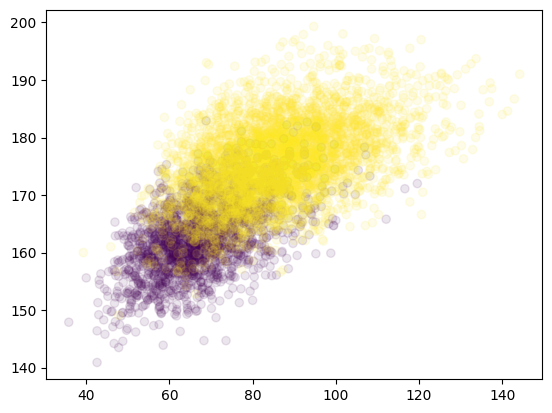

In [25]:
plt.scatter(data['weightkg'], data['stature'], c=data['Gender'], alpha=0.1)
plt.show()

Show heights for women and men on same plot.

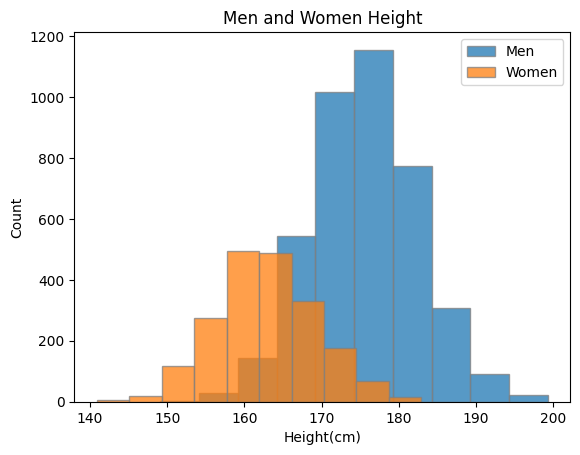

In [26]:
plt.hist(data.query('Gender == 1')['stature'], alpha=0.75, edgecolor='gray')
plt.hist(data.query('Gender == 0')['stature'], alpha=0.75, edgecolor='gray')
plt.title('Men and Women Height')
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.legend(['Men', 'Women'])
plt.show()

### Why is the data of men higher than the data of women?

Men have more consensus at the same heights, and of course the fact that we know more about men has a big impact.

### Why is the data of men more right than the data of women?

Because the average height of men is higher than women

###  dataset to train and test datasets (%80 for train and %20 for test):

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data[['weightkg', 'stature', 'buttockcircumference']].reset_index(drop=True)
X

,weightkg,stature,buttockcircumference
0,65.7,156.0,101.1
1,53.4,166.5,89.3
2,66.3,171.1,98.7
3,78.2,166.0,101.2
4,88.6,157.2,128.1
...,...,...,...
6063,67.5,168.8,91.7
6064,89.6,176.5,104.9
6065,83.2,169.0,103.8
6066,73.1,171.8,92.9


In [29]:
Y = data['Gender']
Y

0       0
1       0
2       0
3       0
4       0
       ..
4077    1
4078    1
4079    1
4080    1
4081    1
Name: Gender, Length: 6068, dtype: int64

In [30]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y,test_size=0.2, random_state=42)

### Implement and fit your object oriented KNN algorithm on the train dataset.

In [31]:
from knn import KNN

In [32]:
knn = KNN(5)
knn.fit(np.array(X_train), np.array(Y_train))

### Evaluate your KNN algorithm on the test dataset with different values of k and write accuracy results as a table in readme.md.

In [33]:
K =[3,5,7,9,11]
accuracy=[]
for k in K:
    knn = KNN(K=k)
    knn.fit(np.array(X_train), np.array(Y_train))
    accuracy.append(knn.evaluate(np.array(X_test), np.array(Y_test)))

In [34]:
print(accuracy)

[0.9717758549649773, 0.9723939019365472, 0.9725999175937371, 0.969097651421508, 0.9676555418211784]


### Calculate confusion matrix for test dataset.

In [35]:
Y_pred = knn.predict(np.array(X_test))

In [36]:
Y = Y_test.reset_index(drop=True)

In [37]:
confusion_matrix = np.zeros((2, 2))
for i in range(len(Y_pred)):
    if Y[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1

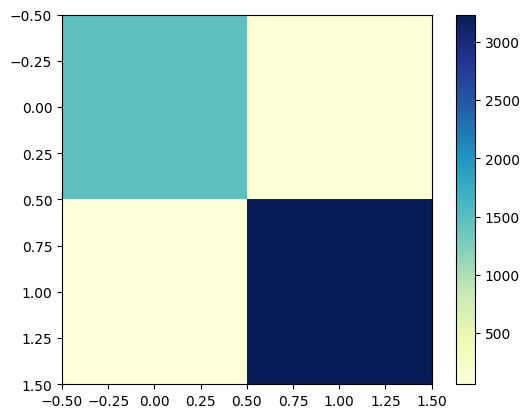

In [38]:
plt.imshow(confusion_matrix, cmap='YlGnBu')
plt.colorbar()
plt.show()

### Fit the scikit-learn KNN algorithm on the train dataset:

In [39]:
from sklearn.neighbors import KNeighborsClassifier



### Evaluate the scikit-learn KNN algorithm on the test dataset. Make sure your accuracy is equal to scikit-learn's accuracy.

In [54]:
K =[3,5,7,9,11]
accuracy_skl=[]
for k in K:
    knn_skl = KNeighborsClassifier(n_neighbors=k)
    knn_skl.fit(X_train, Y_train)
    accuracy_skl.append(knn_skl.score(X_test, Y_test))
    

In [55]:
print(accuracy_skl)

[0.9717758549649773, 0.9723939019365472, 0.9725999175937371, 0.969097651421508, 0.9676555418211784]


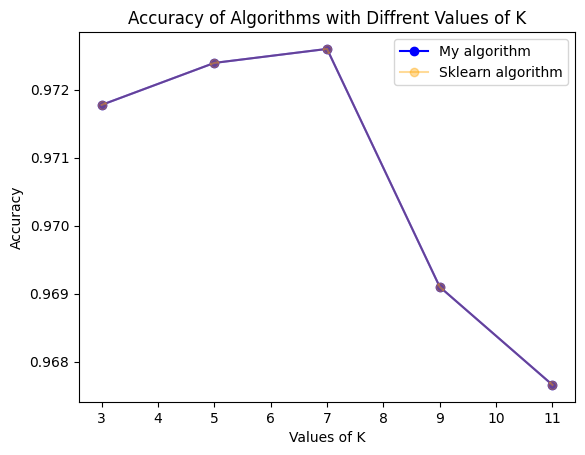

In [57]:
plt.plot(K, accuracy, marker='o', c='Blue')
plt.plot(K, accuracy_skl,marker='o', c='Orange', alpha=0.4)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.legend(['My algorithm','Sklearn algorithm'])
plt.title('Accuracy of Algorithms with Diffrent Values of K')
plt.show()

### Calculate confusion matrix using scikit-learn:

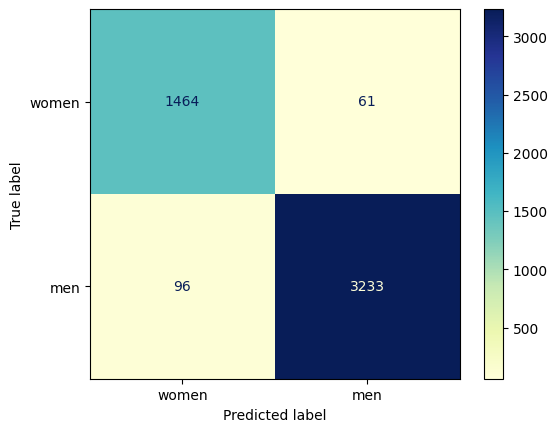

In [42]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_pred, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["women", "men"])

cm_display.plot(cmap='YlGnBu')
plt.show()